<a href="https://colab.research.google.com/github/tienduongftu/Learn-Algorithmic-Trading/blob/master/Lesson_03_Returns_Anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài Số 3: Cách tính Lợi Nhuận & Nghiên cứu Lợi Nhuận trên GOOGLE COLAB

10/10/2022

* QuantLab AIAI Cafe
* Tác Giả: Phan Trường Giang & Nguyễn Đắc Đoàn, Lê Tấn Hùng, Nguyễn Văn Quân

Mục Đích của  Notebook này là làm quen với các bạn cách tính lợi nhuận của HAH và 04 các mã cổ phiếu FPT, VCB, BID, MWG thông qua sử dụng một số hàm Function trong Python - Notebook

Chúng ta tính toán lợi nhuận - Returns thông qua một số cách như sau:

1. Simple Returns:

  * simple_return = prices.pct_change()

2. Log Returns:

  * log_return = np.log(simple_return+1)

3. Cumulative Returns

  * cumreturns = cumprod(1+log_return)

Sau khi tính toán và biểu diễn lợi nhuận thì chúng ta có thể Phân tích biểu đồ của Lợi nhuận - Returns. Mục tiêu là để xem xét mức độ thay đổi của lợi nhuận theo từng giai đoạn, ví dụ biến đổi của lợi nhuận giai đoạn từ 01/01/2021 đến nay hay so sánh giai đoạn 2019 với giai đoạn 2020...vv


Các Bước LOAD dữ liệu &  Nghiên cứu

* I. Load Dữ liệu từ Cơ Sở Dữ Liệu AiAi.Cafe
* II. Phân tích lợi nhuận cho HAH
  * tính toán một số kiểu lợi nhuận
  * Biểu diễn và phân tích lợi nhuận theo các giai đoạn khác nhau
* III. Phân tích lợi nhuận cho 03 Cổ Phiếu: VCB, BID, FPT, MGM, HAH
  * tính toán một số kiểu lợi nhuận
  * Biểu diễn và phân tích lợi nhuận theo các giai đoạn khác nhau
* IV. Kết Luận phân tích

* V. Bài tập nghiên cứu

## I. Load Dữ liệu từ Cơ Sở Dữ Liệu AiAi.Cafe

1. Load số liệu từ cơ sở dữ liệu AiAi.Cafe
* 1a. Load Số Liệu
* 1b. Load các thư viện làm việc
2. Lựa chọn cổ phiếu để phân tích
  * Trong Bài Tập Này:
      * Chúng Ta chọn 01 Phái Sinh Hợp Đồng Tương Lai HAH
      * Chúng Ta chọn 04 cổ phiếu: BID, MWG, VCB, FPT
3. Kiểm tra dữ liệu

In [2]:
#@title 1a. Load VN Stock Data with Python packages - Need Permission {display-mode: "form"}

#!sh -c "$(curl -fsSL https://raw.githubusercontent.com/algo-stocks/data/master/data/zipline.sh)"

In [22]:
#@title 1a'. Load Data from Free Sources: https://github.com/algo-stocks/data
!curl -fsSLO https://raw.githubusercontent.com/algo-stocks/data/master/data.py

In [23]:
#@title 1b. Load  Các thư viện làm việc { display-mode: "form" }

!pip install -q alphalens
!sed -i 's/get_values/to_numpy/g' /usr/local/lib/python3.7/dist-packages/alphalens/tears.py
!pip install -q pyfolio

import data
from data import get_pricing
import math
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

import pyfolio as pf

sed: can't read /usr/local/lib/python3.7/dist-packages/alphalens/tears.py: No such file or directory


#### 2. Lựa chọn HAH & 04 Mã cổ phiếu FPT, MWG, VCB, BID để phân tích
'FPT', 'MWG', 'BID', 'VCB', 'HAH'

In [30]:
# 'FPT', 'MWG', 'BID', 'VCB', 'HAH', 'HAH'
assets = ['FPT','MWG','BID', 'VCB', 'HAH','DNH']
dataset = None
for asset in assets:
    data = get_pricing(asset, start_date='2006-03-12')
    data = data.reset_index()
    data['ticker'] = asset

    if dataset is None:
      dataset = data
    else:
      dataset = pd.concat([dataset, data], ignore_index=True)


### 3. Kiểm Tra dữ liệu

In [31]:
#@title 3. Dữ Liệu Đầu Vào { display-mode: "form" }
dataset = dataset.reset_index()
dataset

,index,date,ticker,open,high,low,close,volume
0,0,2006-12-13,FPT,11.4000,11.4000,11.4000,11.4372,83530
1,1,2006-12-14,FPT,11.9700,11.9700,11.9700,12.0091,280710
2,2,2006-12-15,FPT,12.5685,12.5685,12.5685,12.6095,265300
3,3,2006-12-18,FPT,13.1955,13.1955,13.1955,13.2386,215790
4,4,2006-12-19,FPT,13.8510,13.8510,13.8510,13.8962,137520
...,...,...,...,...,...,...,...,...
16800,16800,2024-11-29,DNH,32.8678,33.8345,32.8678,33.8345,304
16801,16801,2024-12-11,DNH,34.8012,34.8012,34.8012,34.8012,100
16802,16802,2024-12-19,DNH,34.8000,34.8000,34.8000,36.0000,1
16803,16803,2024-12-23,DNH,34.8000,34.8000,34.8000,36.0000,1


In [33]:
dataset['ticker'].unique()

array(['FPT', 'MWG', 'BID', 'VCB', 'HAH', 'DNH'], dtype=object)

In [34]:

prices = None

for asset in assets:
    price = get_pricing(asset, start_date='2010-01-01', fields='close').rename(columns={
        'close': asset
    })
    if prices is None:
        prices = price
    else:
        prices = prices.join(price)

## II. Tính toán và phân tích Lợi Nhuận HAH

 * Các Bước phân tích
1.   Biểu diễn Giá HAH theo thời gian (Ví dụ từ 01/01/2017 & 01/01/2021)
2.   Tính lợi nhuận "Đơn giản" - Simple Returns
3.   Tính lợi nhuận - Logarithm Returns
4.   Biểu Diễn Lợi nhuận theo thời gian
5.   Tính Lợi nhuận kép - Cumulative Return & Biểu diến theo thời gian
6.   Phân tích số liệu

<Axes: xlabel='date'>

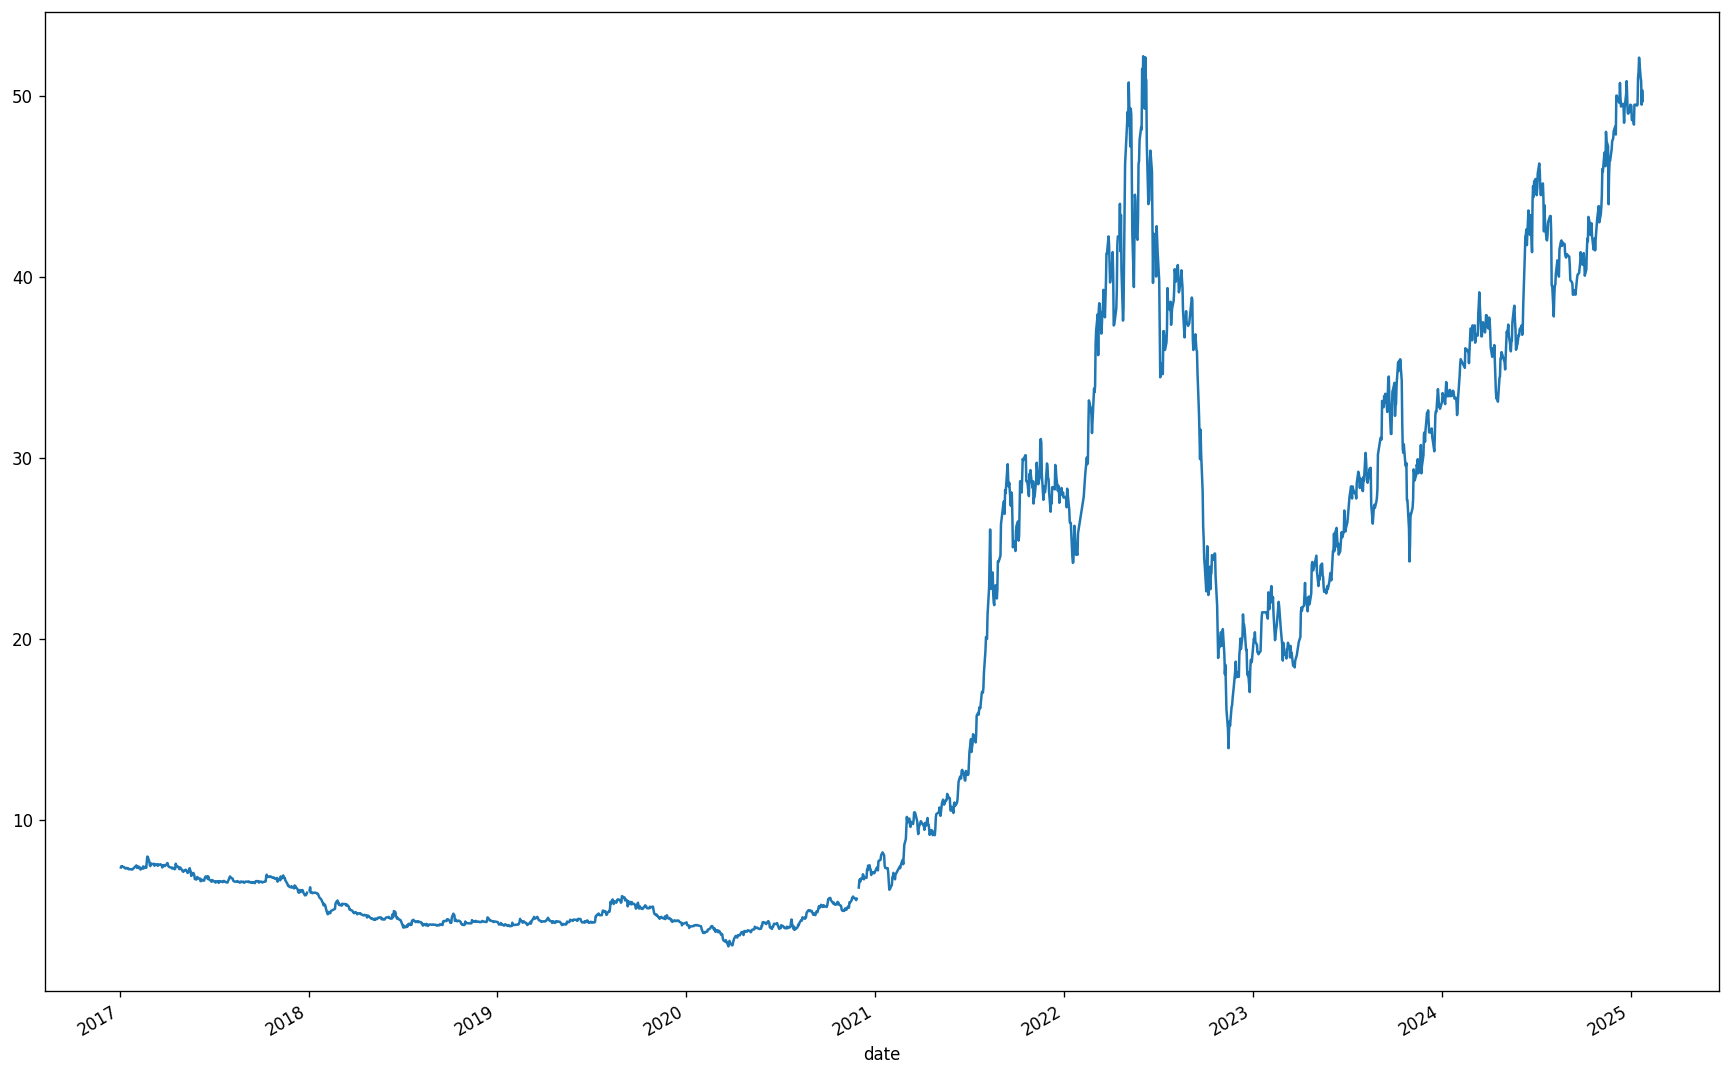

In [12]:
#@title Biểu Diễn  Giá HAH từ ngày 01/01/2017{ display-mode: "form" }
prices['HAH'].loc['2017-01-01':].plot()

<Axes: xlabel='date'>

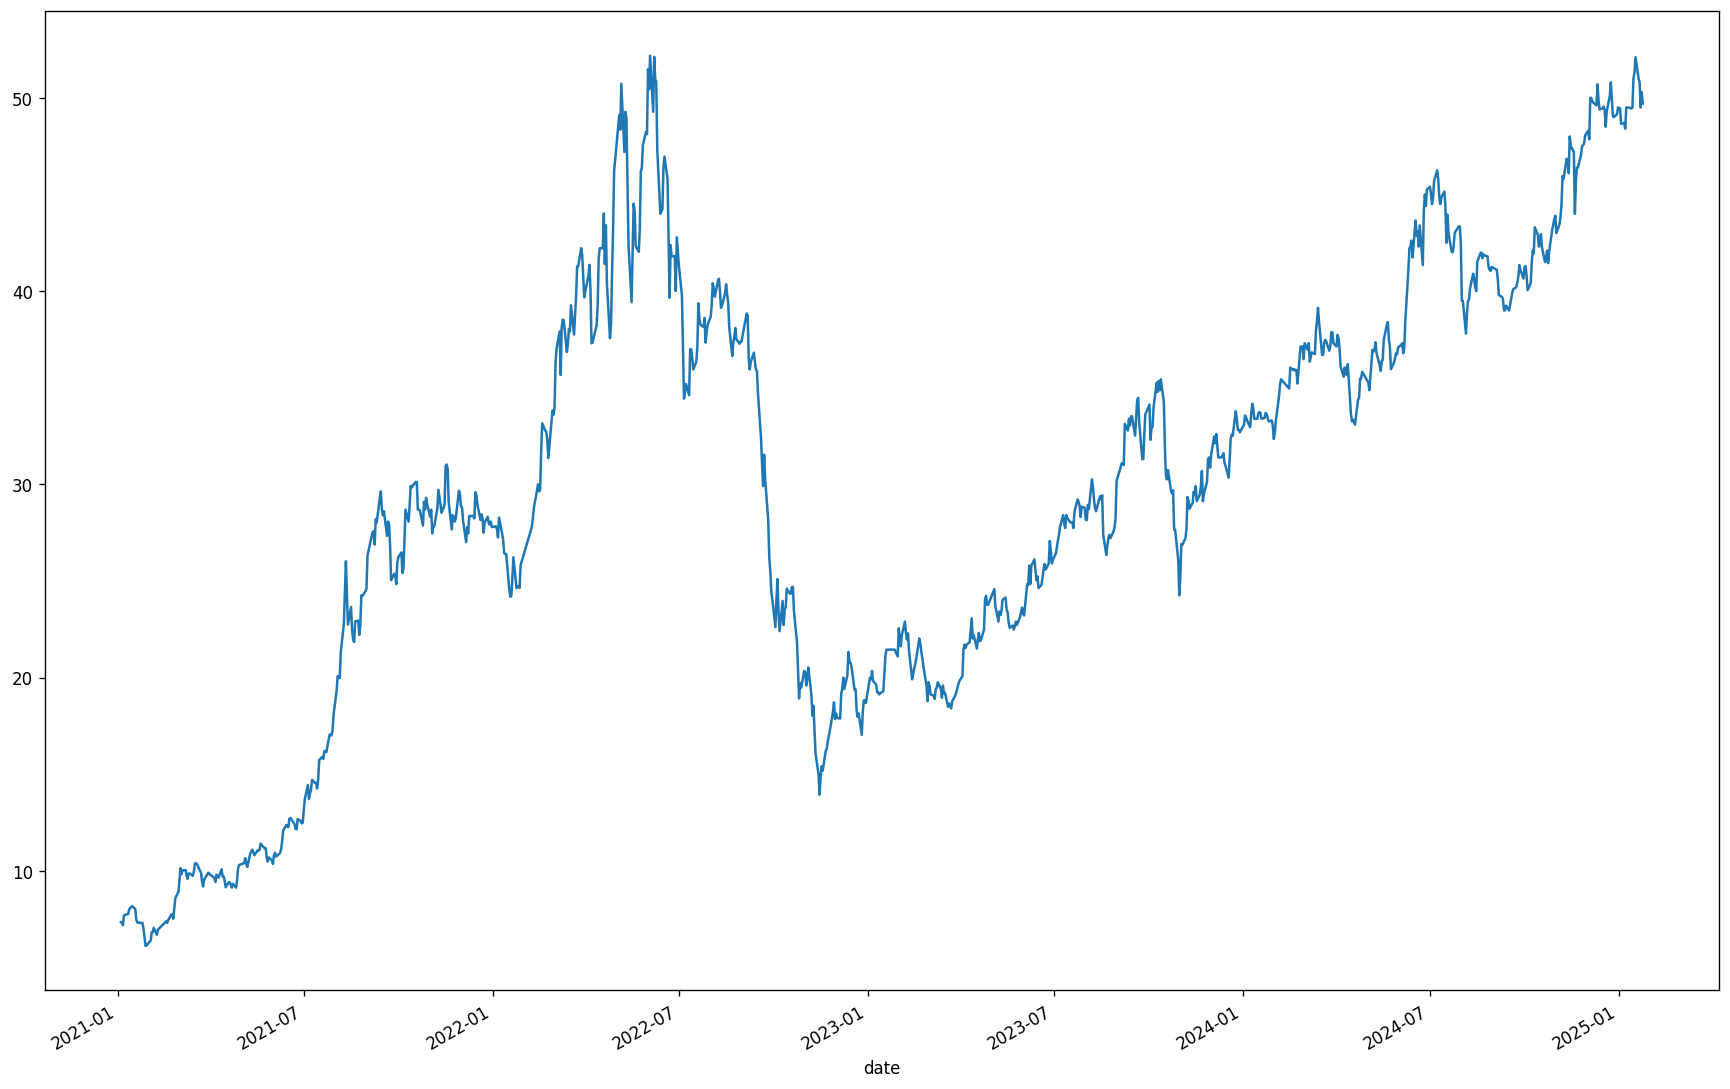

In [14]:
#@title Biểu Diễn  Giá HAH từ ngày 01/01/2021 { display-mode: "form" }
prices['HAH'].loc['2021-01-01':].plot()

### Tính Lợi Nhuận Đơn Giản:  Simple - Retuns & Log Returns, Cumulative Returns

1. Simple Returns:
* simple_return = prices.pct_change()

2. Log Returns:

* log_return = np.log(simple_return+1)

3. Cumulative Returns

* cumreturns = cumprod(1+log_return)

In [35]:
#@title Simple Returns & Log Returns { display-mode: "form" }
r = prices.pct_change()
R = np.log(r+1)

print ("Simple retunrs:\n")
print (r['HAH'].dropna())
print ("\nLog retunrs:\n")
print (R['HAH'].dropna())


Simple retunrs:

date
2015-03-12   -0.069475
2015-03-13   -0.067875
2015-03-16   -0.067963
2015-03-17   -0.067710
2015-03-18    0.033521
                ...   
2025-01-20   -0.021113
2025-01-21   -0.003922
2025-01-22   -0.025591
2025-01-23    0.016162
2025-01-24   -0.011928
Name: HAH, Length: 2471, dtype: float64

Log retunrs:

date
2015-03-12   -0.072007
2015-03-13   -0.070289
2015-03-16   -0.070383
2015-03-17   -0.070112
2015-03-18    0.032971
                ...   
2025-01-20   -0.021339
2025-01-21   -0.003929
2025-01-22   -0.025924
2025-01-23    0.016032
2025-01-24   -0.012000
Name: HAH, Length: 2471, dtype: float64


<Axes: xlabel='date'>

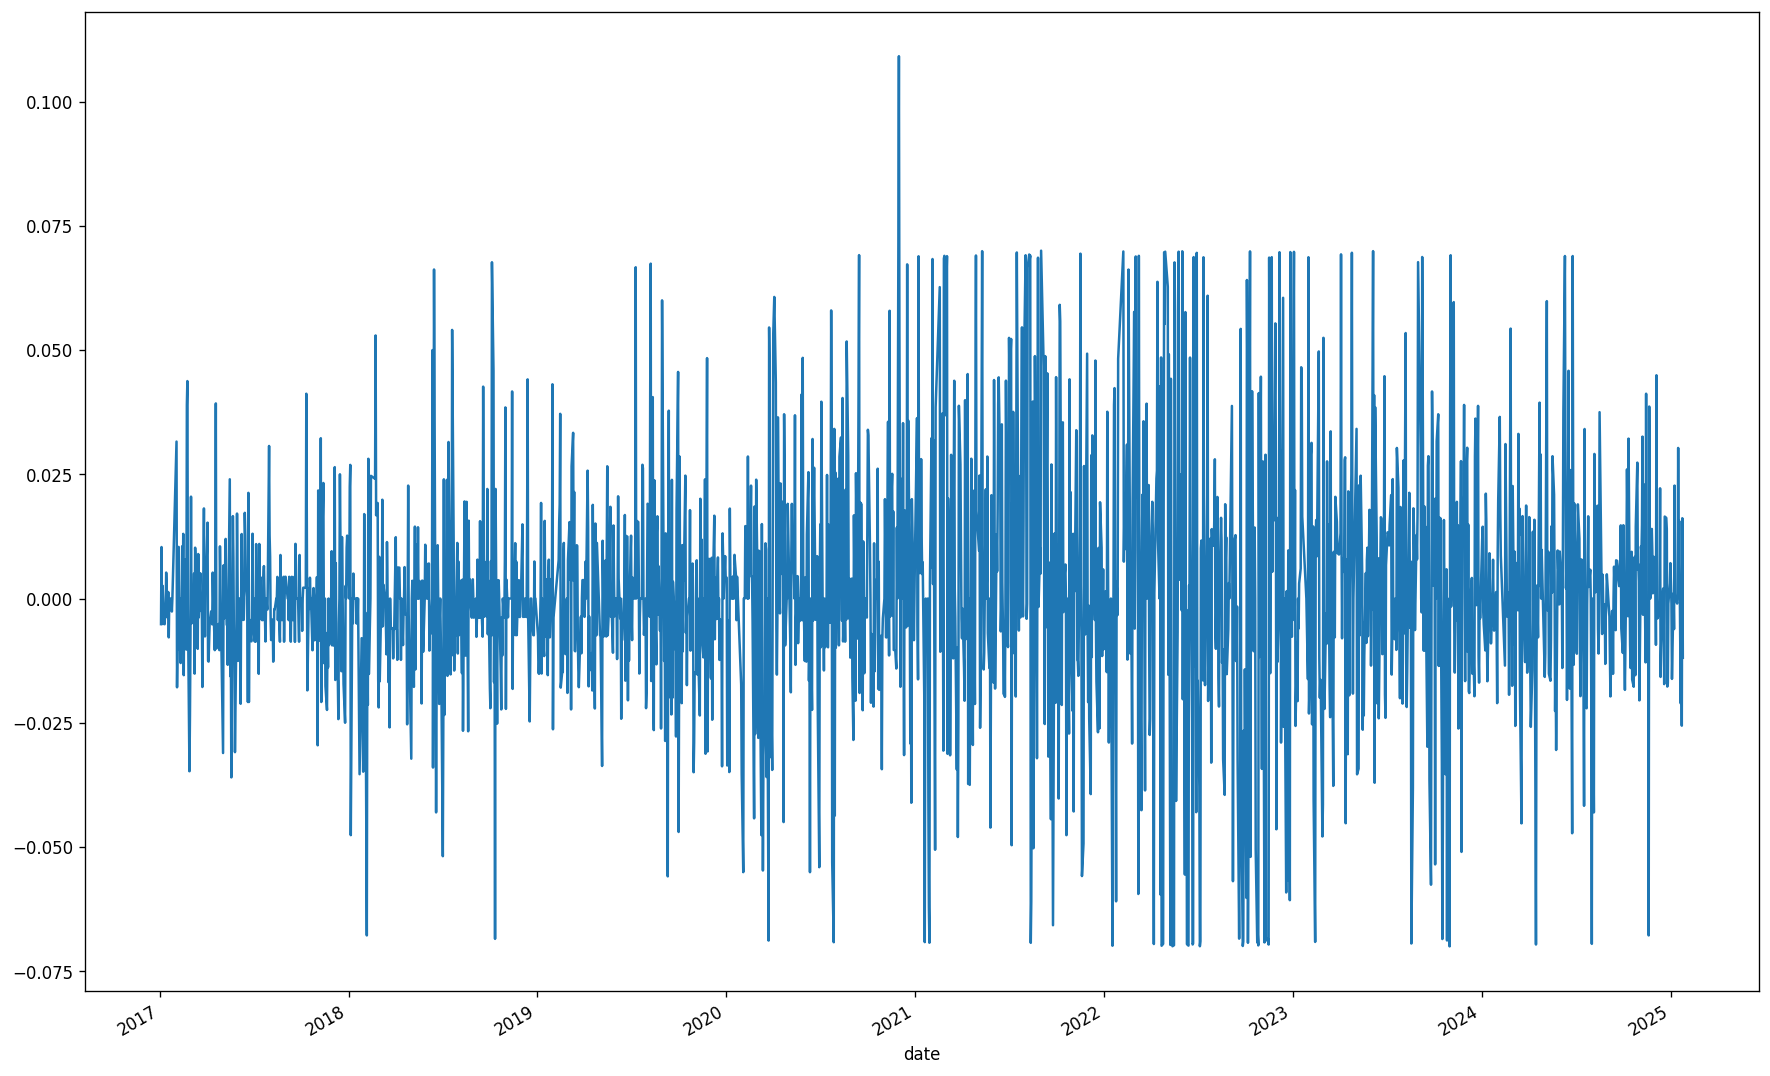

In [36]:
#@title Biểu Diễn Simple Retuns giai đoạn từ Tháng 01/2017 Đến Nay { display-mode: "form" }
r['HAH'].loc['2017-01-01':].plot()

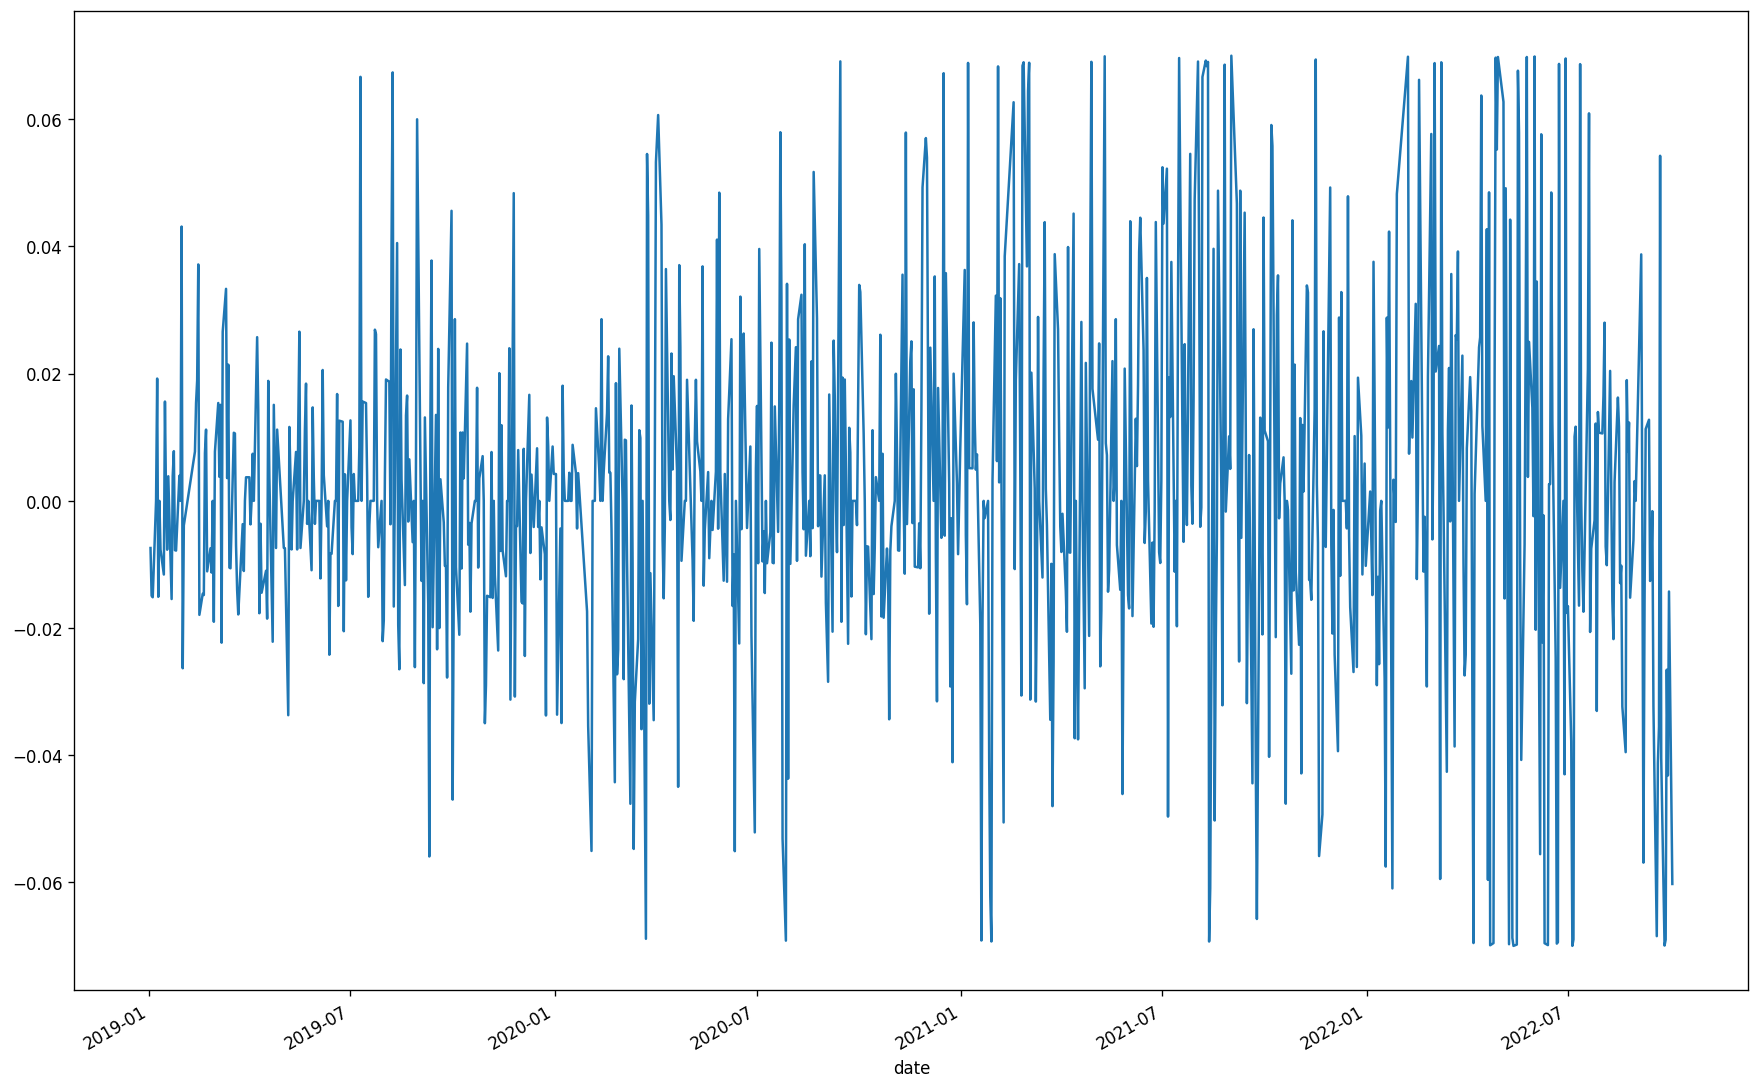

In [ ]:
#@title Biểu Diễn Simple Retuns giai đoạn từ Tháng 01/2019 Đến Nay { display-mode: "form" }
r['HAH'].loc['2019-01-01':].plot()

<Axes: xlabel='date'>

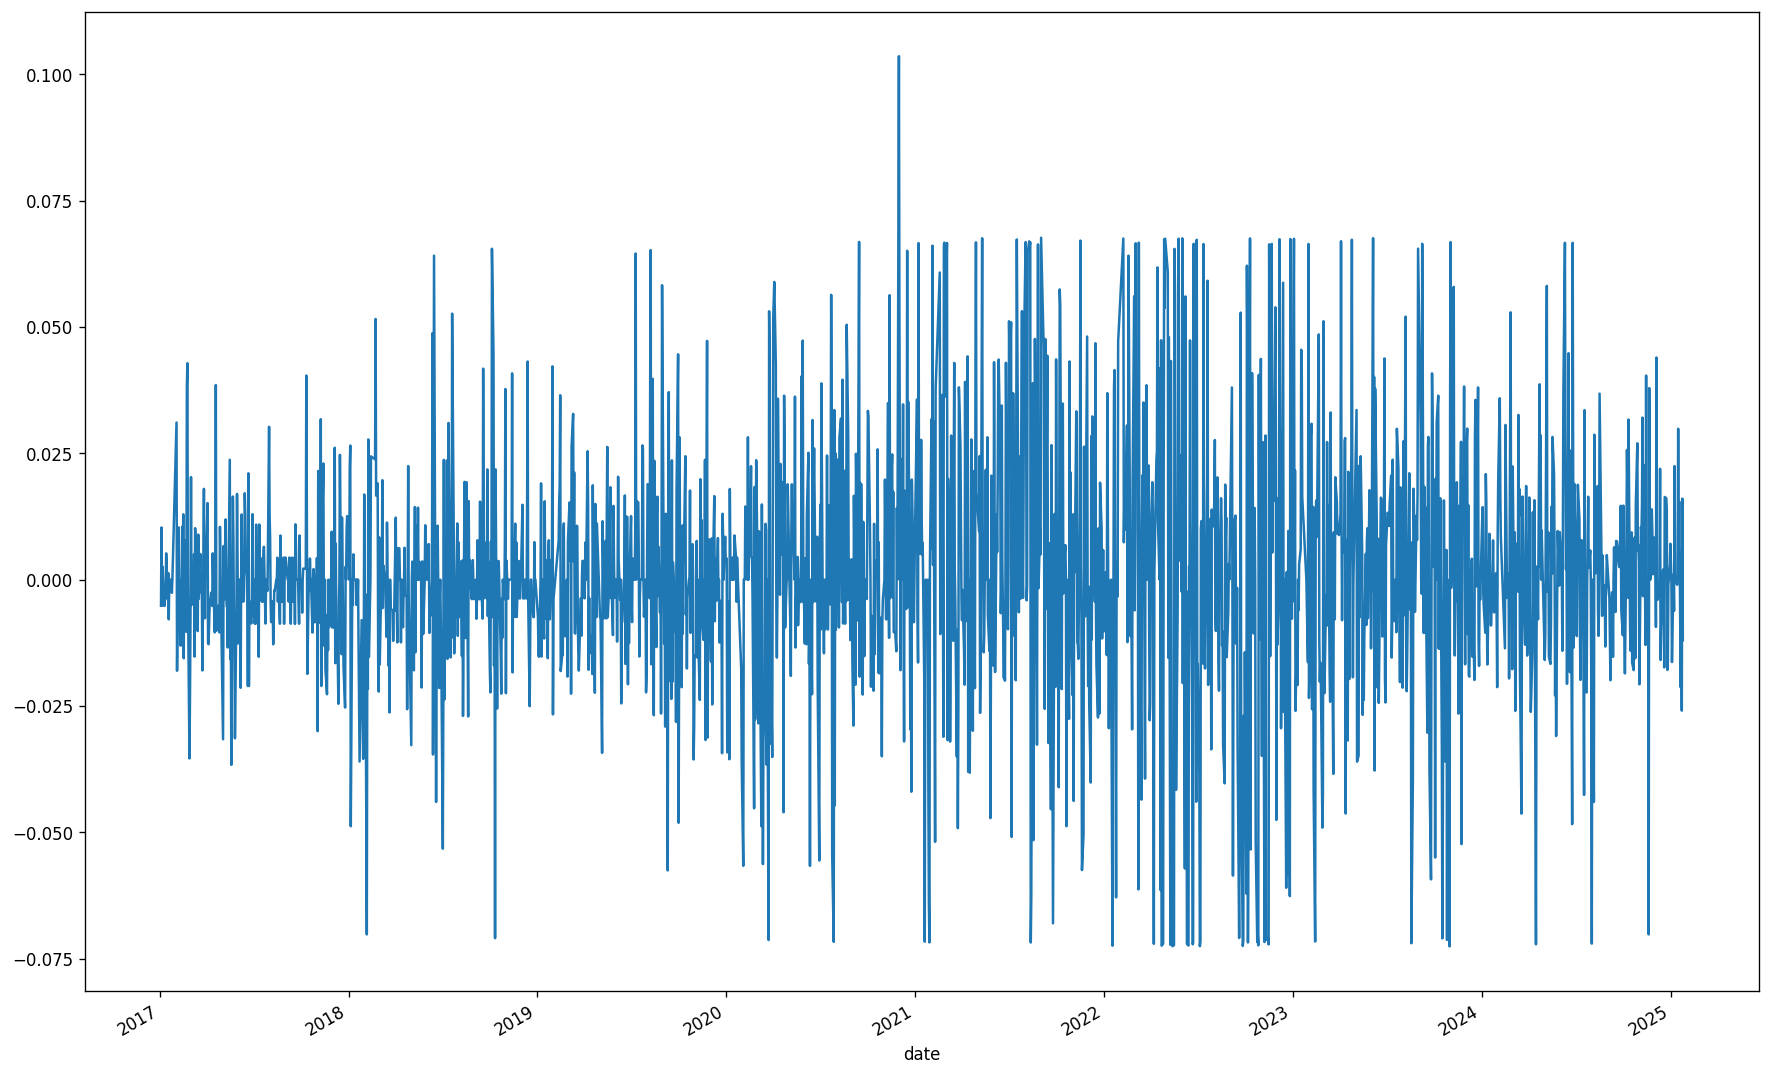

In [37]:
#@title Biểu Diễn Log Retuns giai đoạn từ Tháng 01/2017 Đến Nay { display-mode: "form" }
R['HAH'].loc['2017-01-01':].plot()

<Axes: xlabel='date'>

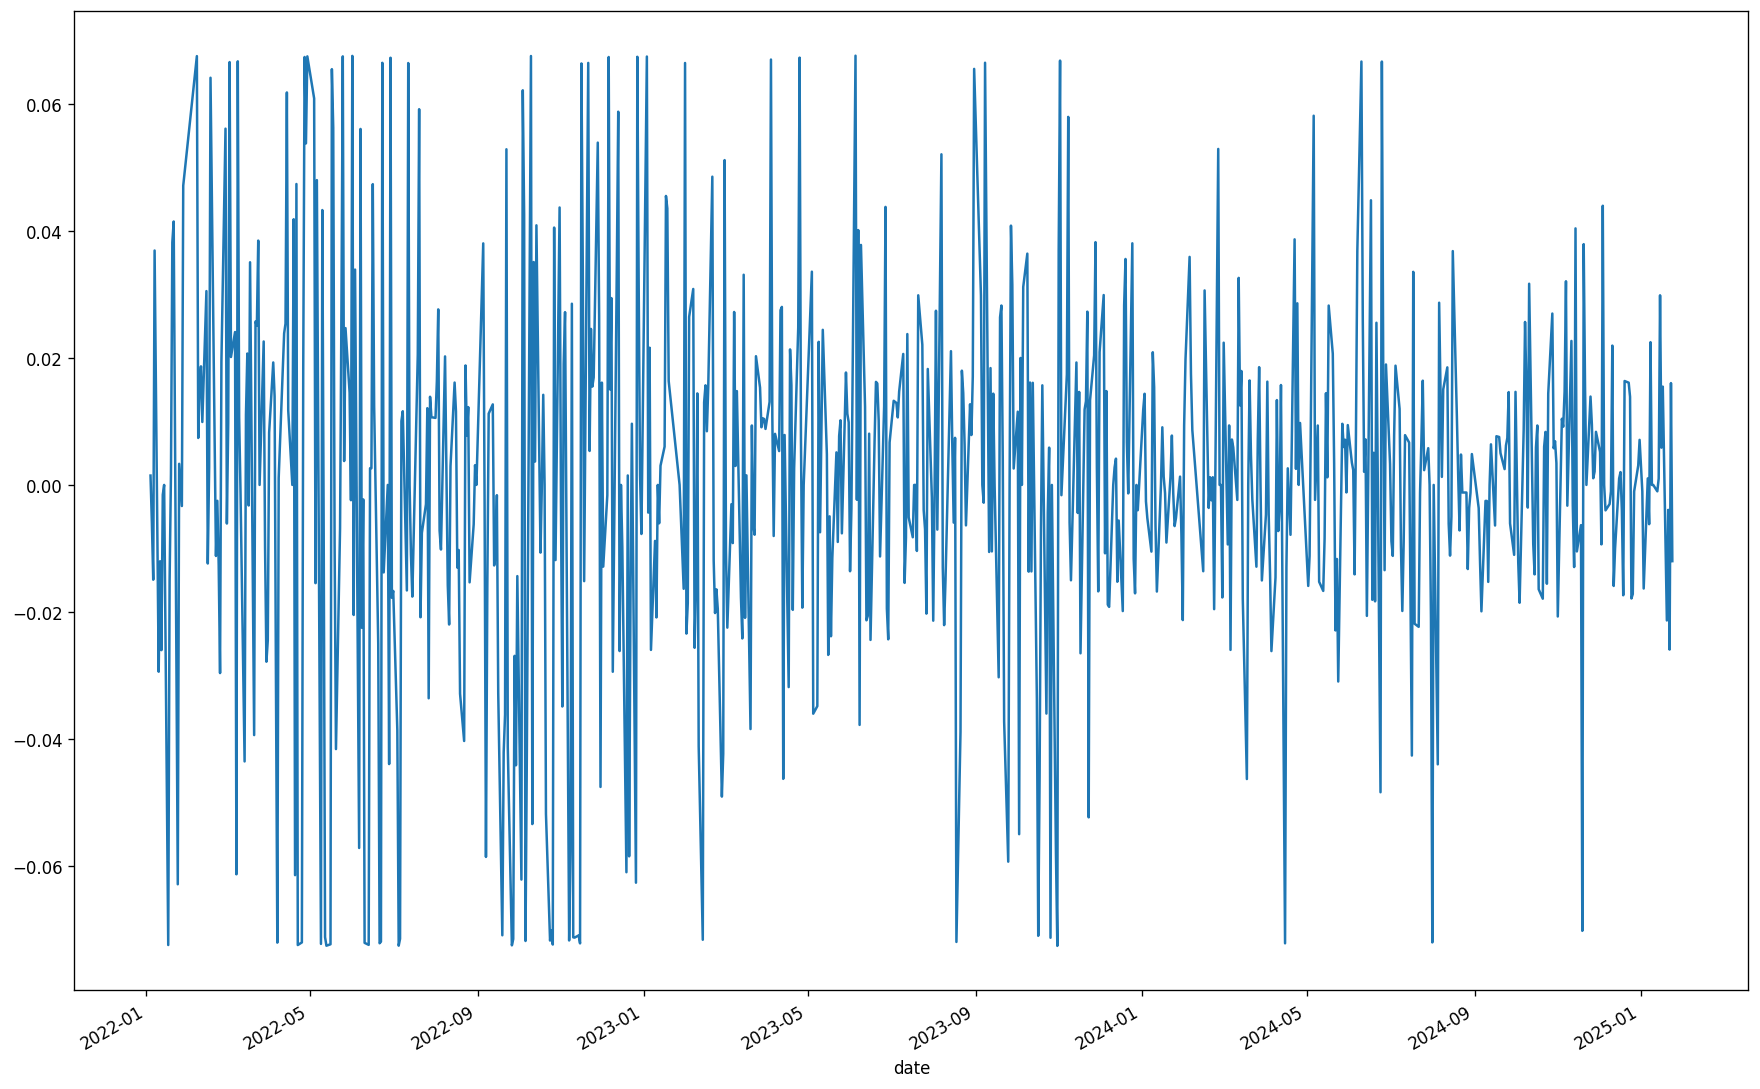

In [38]:
#@title Biểu Diễn Log Retuns giai đoạn từ Tháng 01/2019 Đến Nay { display-mode: "form" }
R['HAH'].loc['2022-01-01':].plot()

<Axes: xlabel='date'>

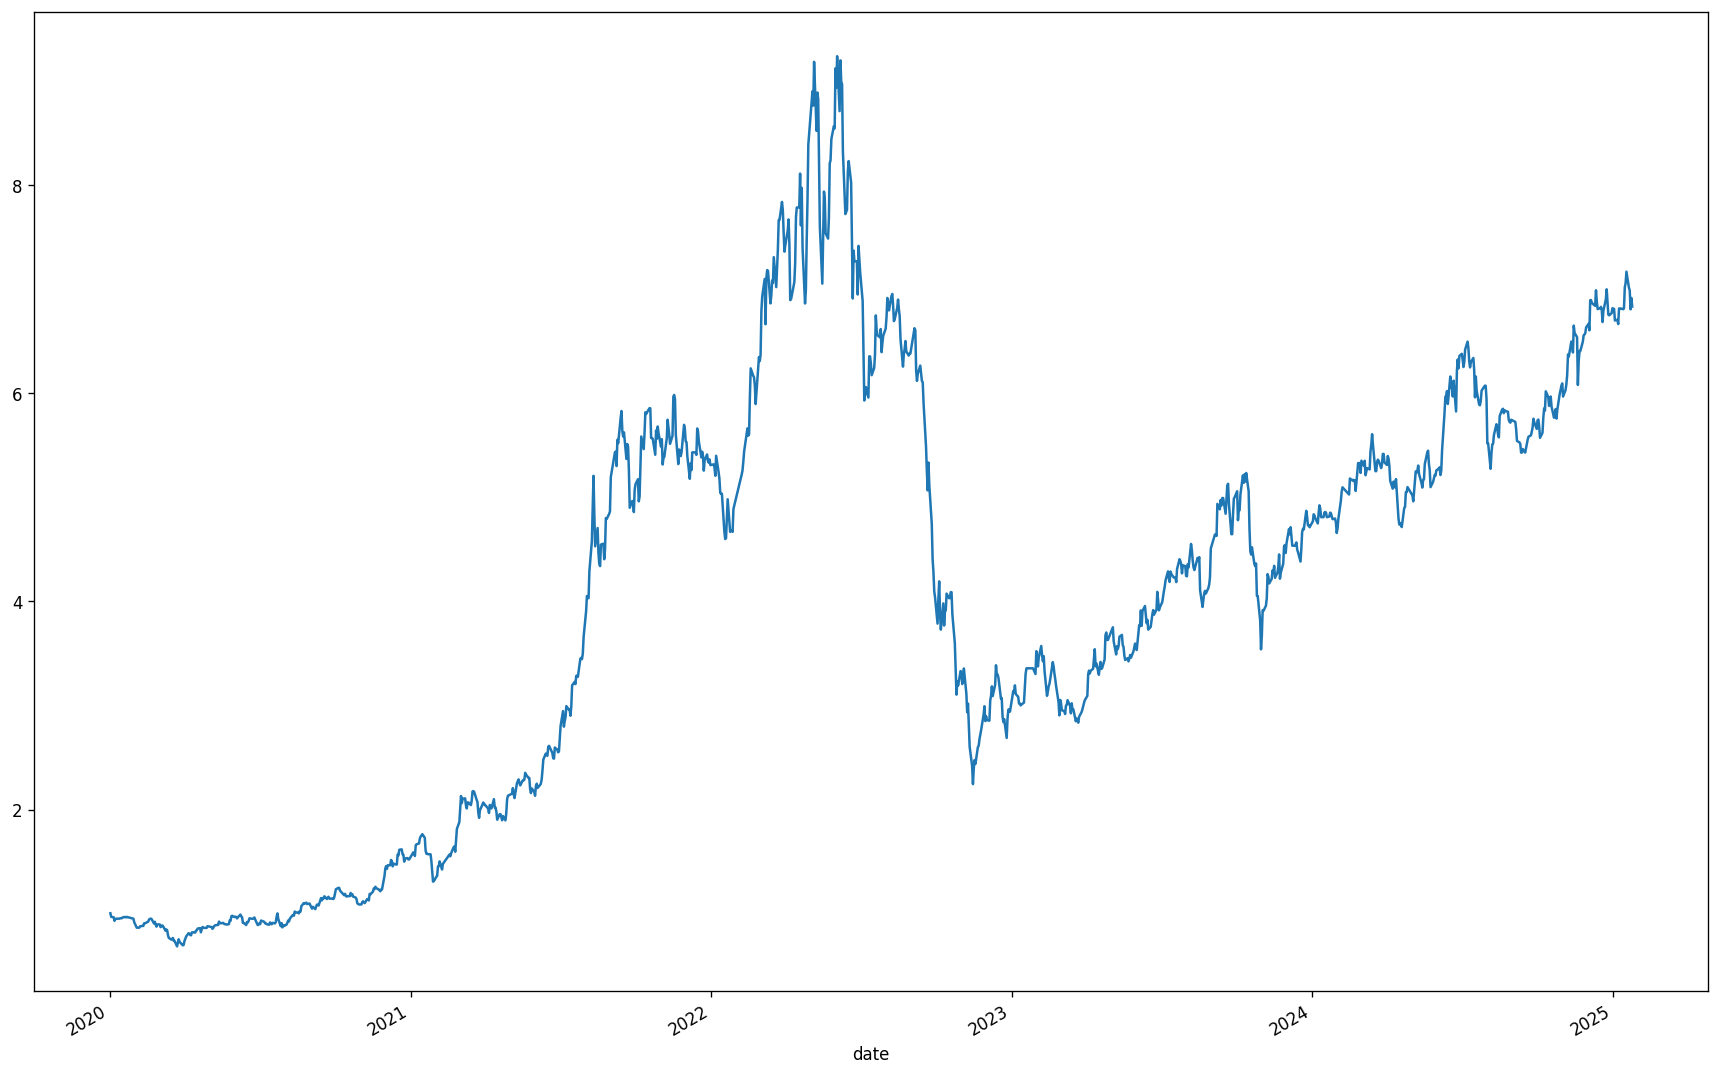

In [39]:
#@title Biểu Diễn Cumuilative Retuns giai đoạn từ Tháng 01/2017 Đến Nay { display-mode: "form" }
np.cumprod(1+R['HAH'].loc['2020-01-01':]).plot()

<Axes: xlabel='date'>

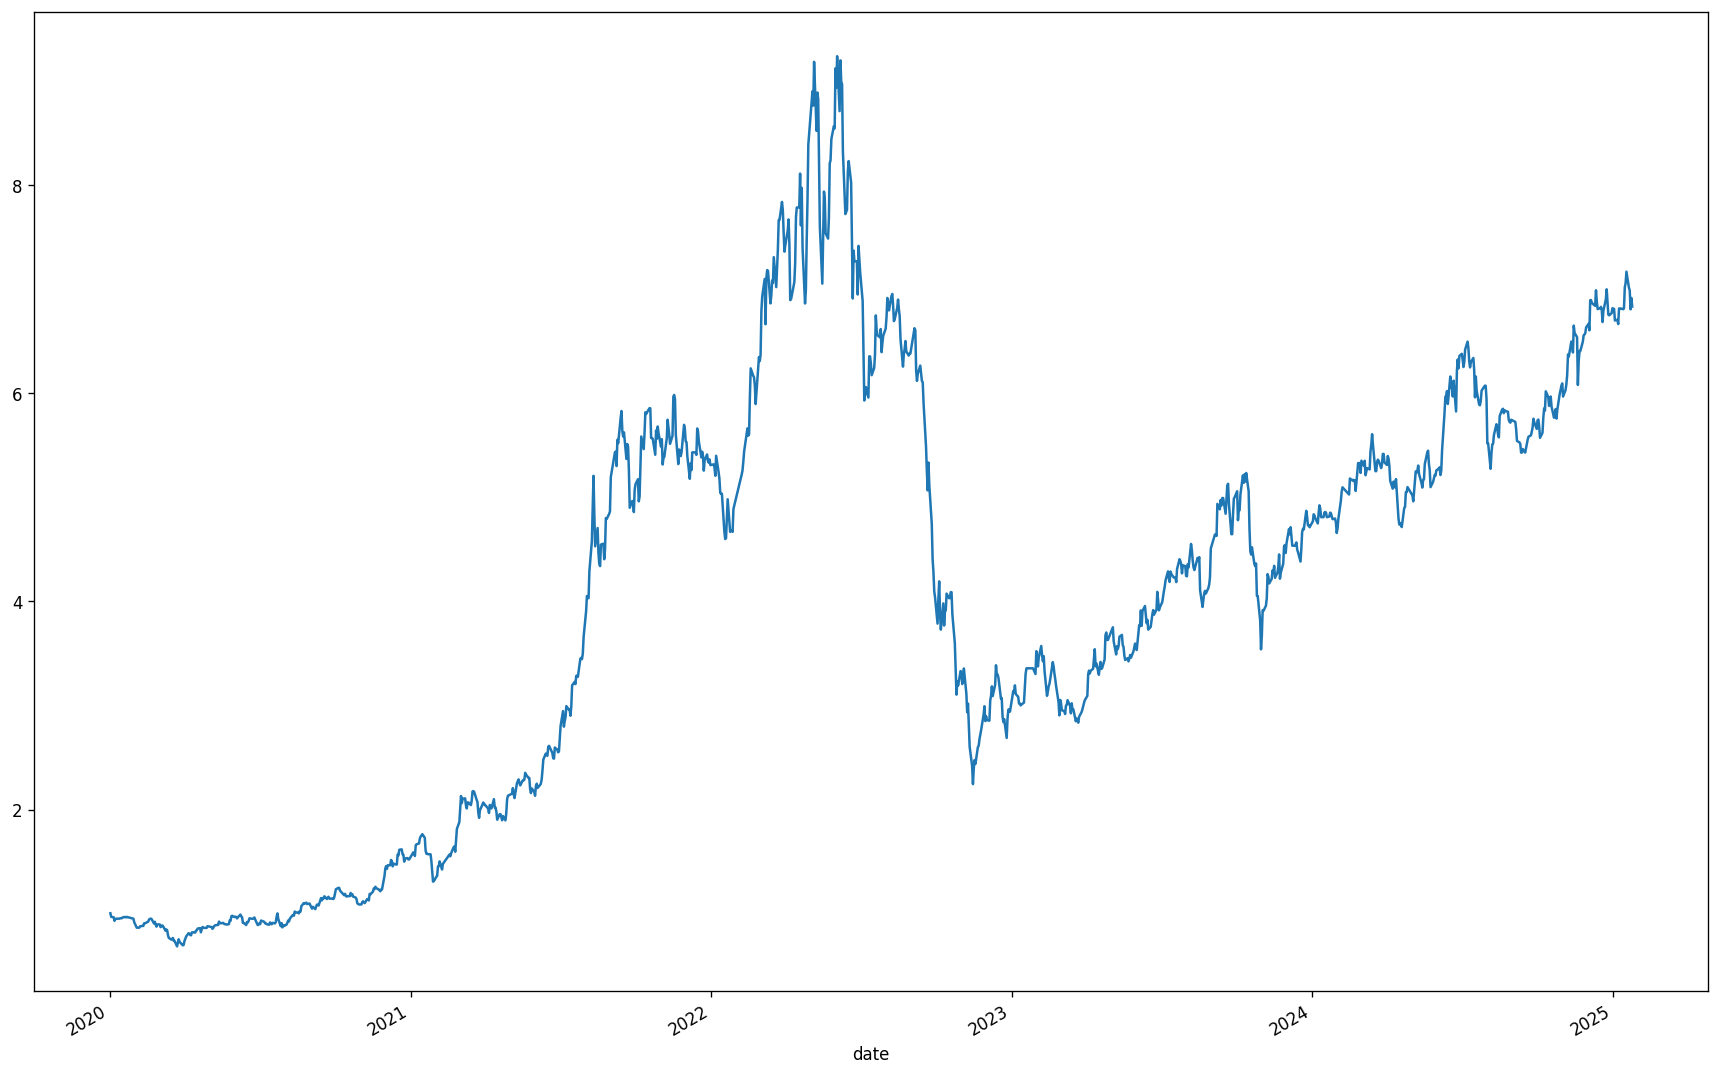

In [40]:
#@title Biểu Diễn Cumuilative Retuns giai đoạn từ Tháng 01/2020 Đến Nay { display-mode: "form" }
np.cumprod(1+R['HAH'].loc['2020-01-01':]).plot()

# New Section

Như biểu đồ lợi nhuận (Cumulative returns) như trên thì chúng ta có một số nhận xét như sau:

* Sau Covid (bắt đầu 07/2020 đến nay 06/2021) HAH đang đà tăng trưởng tốt tỷ lệ là 1.6 so với thời điểm 01/01/2020.

## III. Tính toán và phân tích Lợi Nhuận 04  mã cổ Phiếu: FPT, VCB, BID, MWG

 * Các Bước phân tích
1.   Biểu diễn Giá 04 mã Cổ Phiếu
2.   Tính lợi nhuận "Đơn giản" - Simple Returns
3.   Tính lợi nhuận - Logarithm Returns
4.   Biểu Diễn Lợi nhuận theo thời gian
5.   Tính Lợi nhuận kép - Cumulative Return & Biểu diến theo thời gian
6.   Phân tích lợi nhuận

<Axes: title={'center': 'Price Data of 04 Stocks from 2015'}, xlabel='date'>

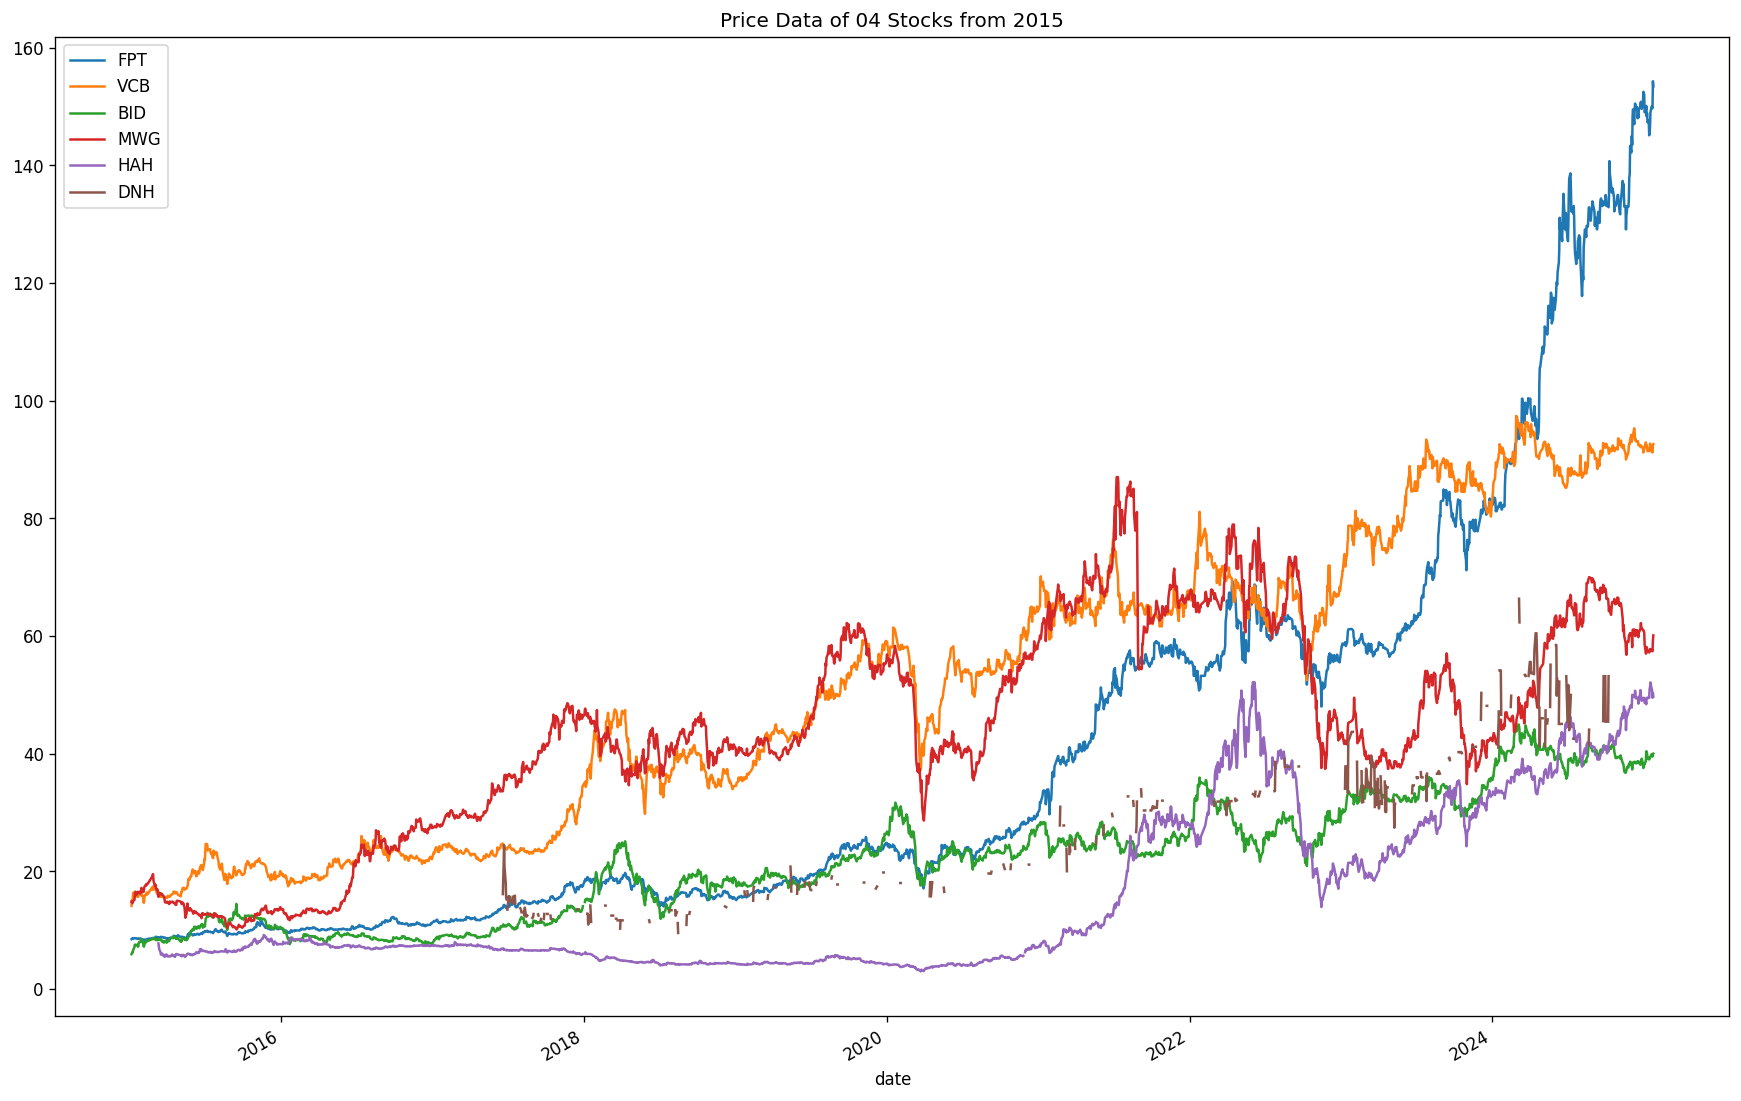

In [42]:
#@title Biểu Diễn  Giá 04 Cổ Phiếu từ 01/01/2015 { form-width: "20%", display-mode: "form" }
prices[['FPT','VCB','BID','MWG', 'HAH','DNH']].loc['2015-01-01':].plot(title='Price Data of 04 Stocks from 2015')

In [43]:
#@title Tính toán Simple Returns & Log Returns 05 mã Cổ Phiếu 'MWG','FPT', 'VCB','BID','HAH' { display-mode: "form" }
print("Simple returns: \n",r[['FPT','VCB','BID','MWG','HAH','DNH']])
print("\nLog returns: \n",R[['FPT','VCB','BID','MWG','HAH','DNH']])

Simple returns: 
                  FPT       VCB       BID       MWG       HAH       DNH
date                                                                  
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2010-01-05  0.000000  0.010140       NaN       NaN       NaN       NaN
2010-01-06 -0.018186 -0.036141       NaN       NaN       NaN       NaN
2010-01-07 -0.006169 -0.020838       NaN       NaN       NaN       NaN
2010-01-08 -0.031052  0.000000       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2025-01-20  0.006711 -0.008649  0.010127 -0.003466 -0.021113  0.000000
2025-01-21 -0.000667 -0.003272 -0.002506  0.003478 -0.003922  0.000000
2025-01-22 -0.001334 -0.002188 -0.007538 -0.005199 -0.025591  0.000000
2025-01-23  0.030728  0.014254  0.010127  0.031359  0.016162  0.000000
2025-01-24 -0.005833  0.001081  0.002506  0.015203 -0.011928  0.138889

[3757 rows x 6 columns]

Log returns: 
                  F

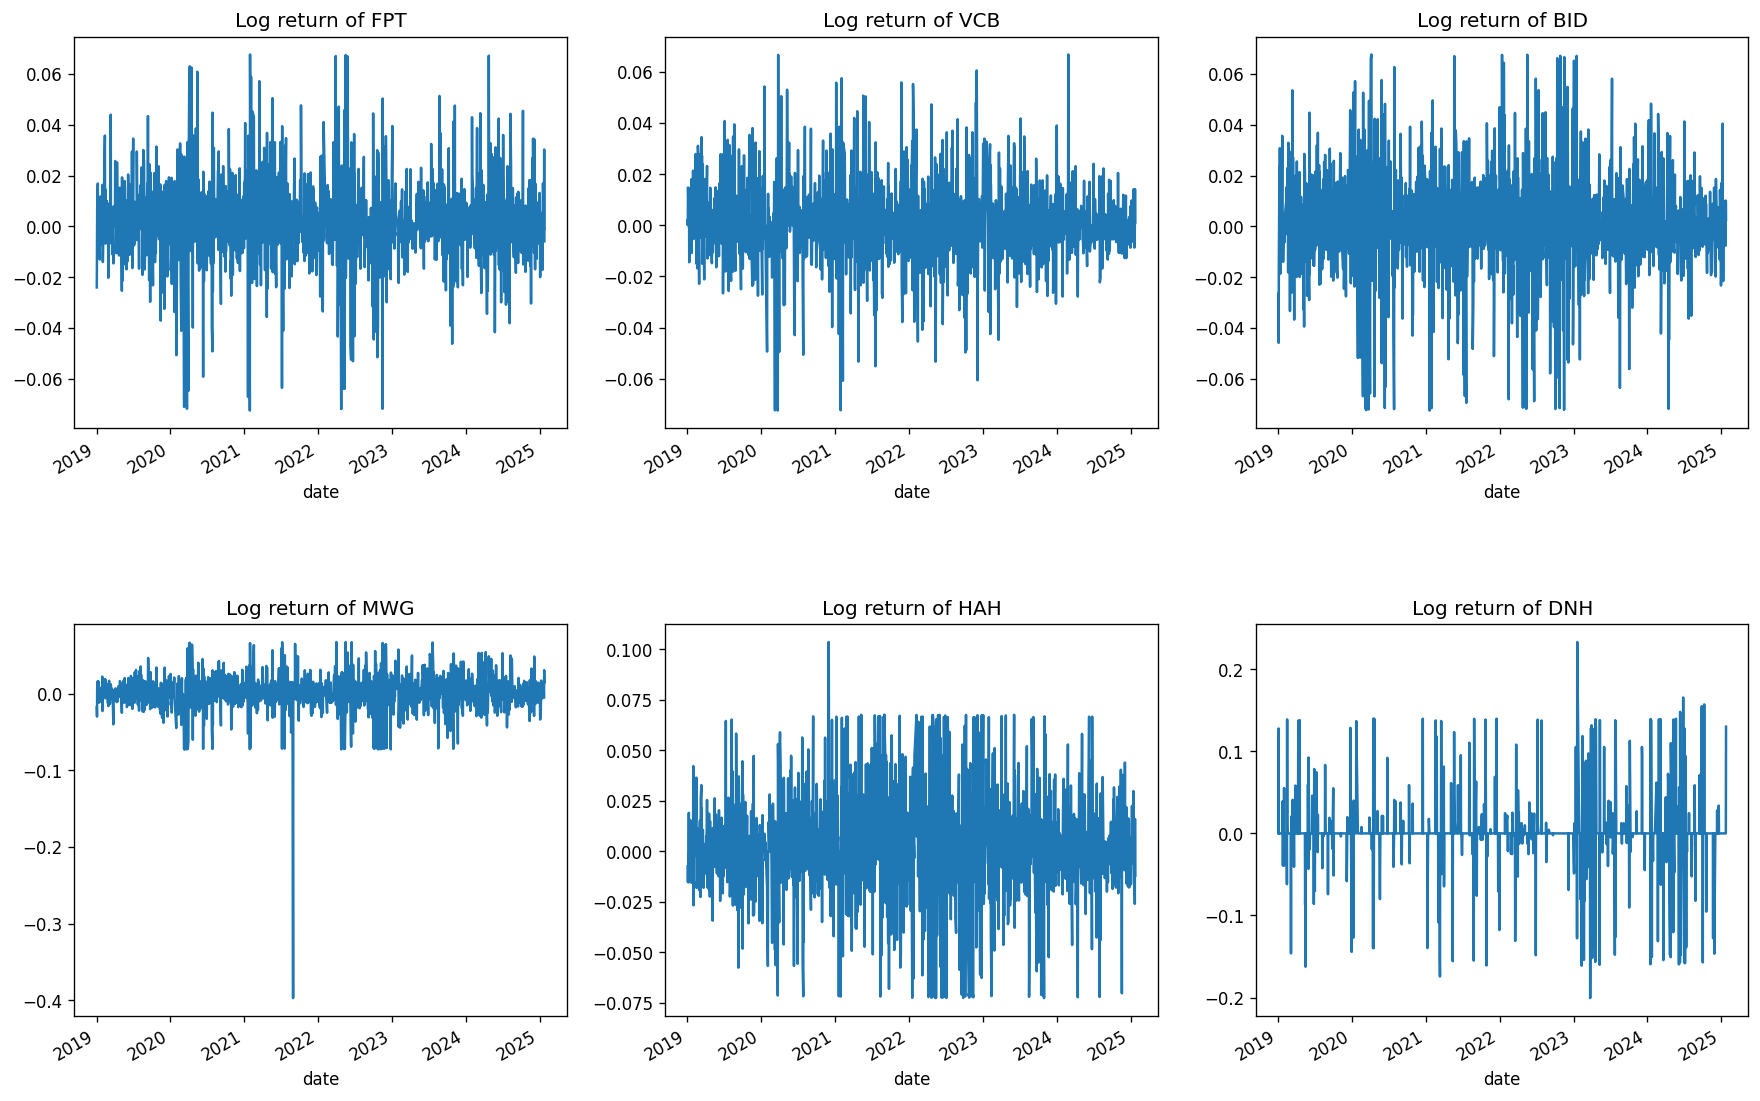

In [44]:
#@title Biểu Diễn Log Returns giai đoạn từ Tháng 01/2019 Đến Nay cho từng cổ phiếu { form-width: "20%", display-mode: "form" }
a =1
for ticker in ['FPT','VCB','BID','MWG','HAH','DNH']:
  plt.subplot(2,3,a)
  plt.title("Log return of "+ticker)
  plt.subplots_adjust (None, None, None, None, None, 0.5)
  R[ticker].loc['2019-01-01':].plot()
  a=a+1

<Axes: title={'center': 'Cumulative Return of 05 Stocks from 01 Jan 2019'}, xlabel='date'>

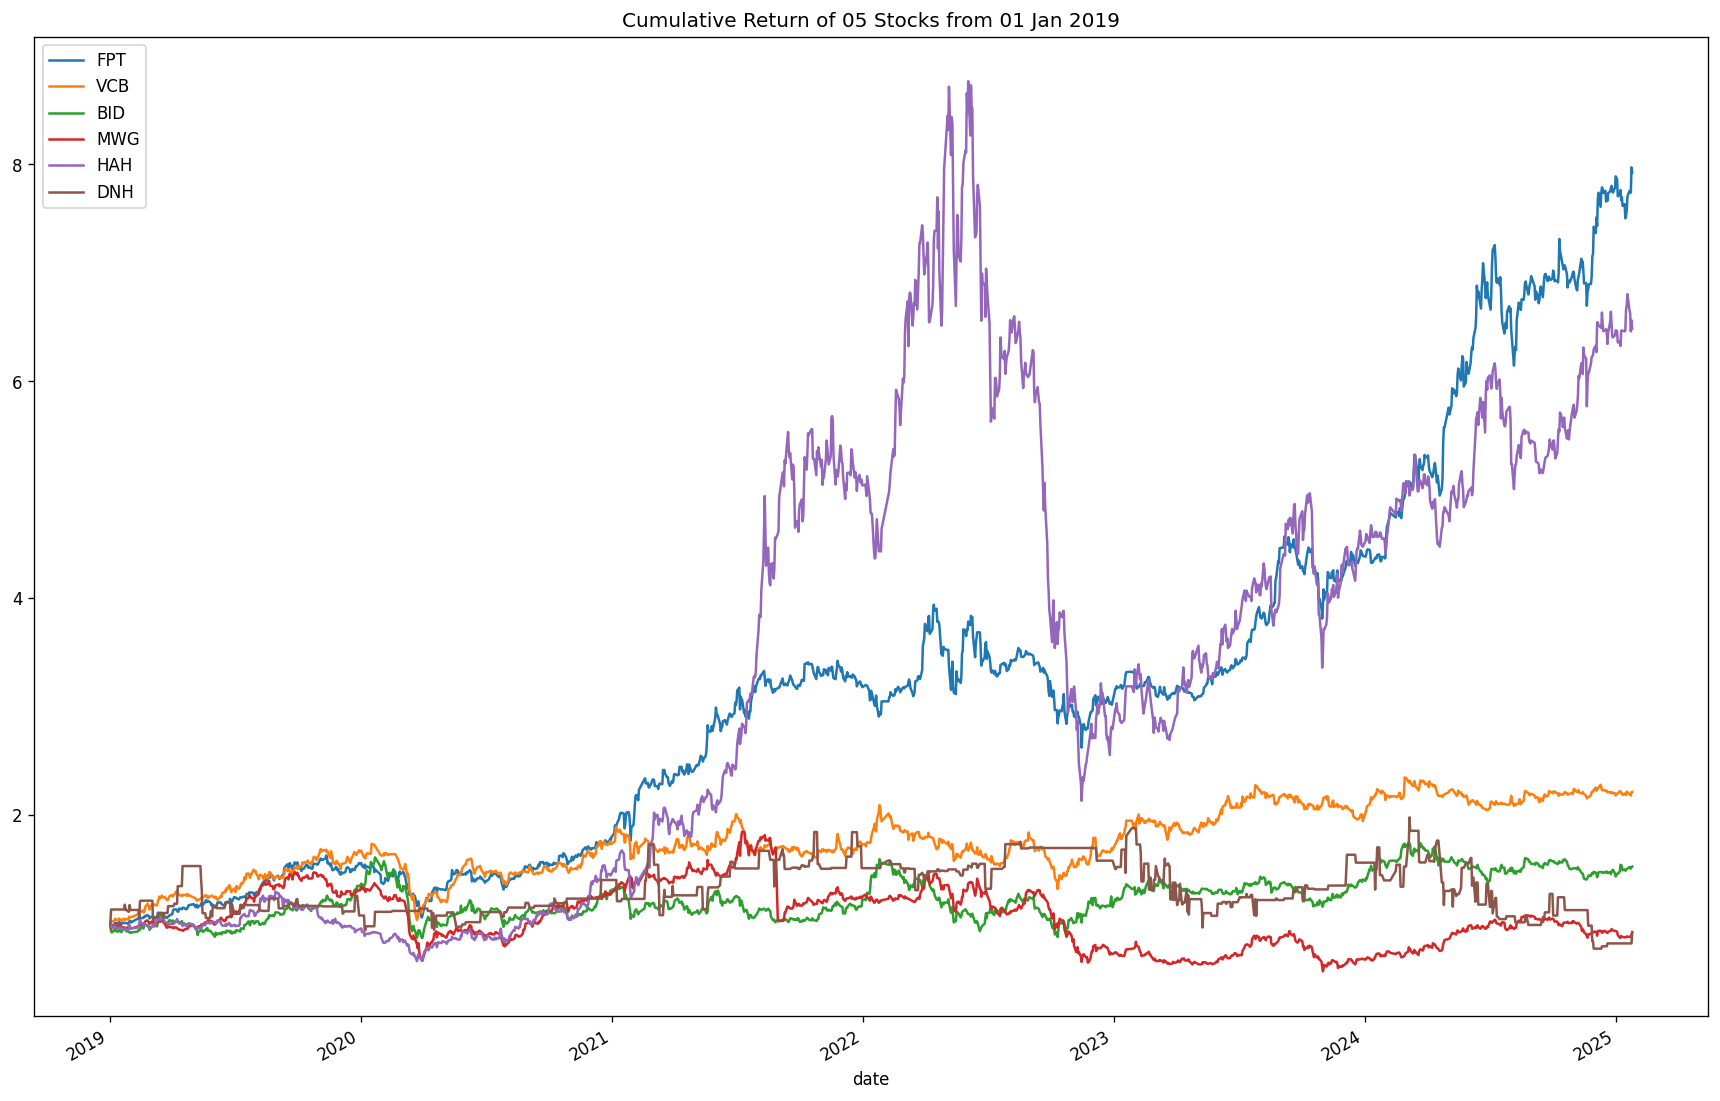

In [45]:
#@title Biểu Diễn Cumuilative Retuns từ 01/01/2019 { display-mode: "form" }
np.cumprod(1+R[['FPT','VCB','BID','MWG', 'HAH','DNH']].loc['2019-01-01':]).plot(title='Cumulative Return of 05 Stocks from 01 Jan 2019')

<Axes: title={'center': 'Cumulative Return of 05 Stocks from 01 Jan 2020'}, xlabel='date'>

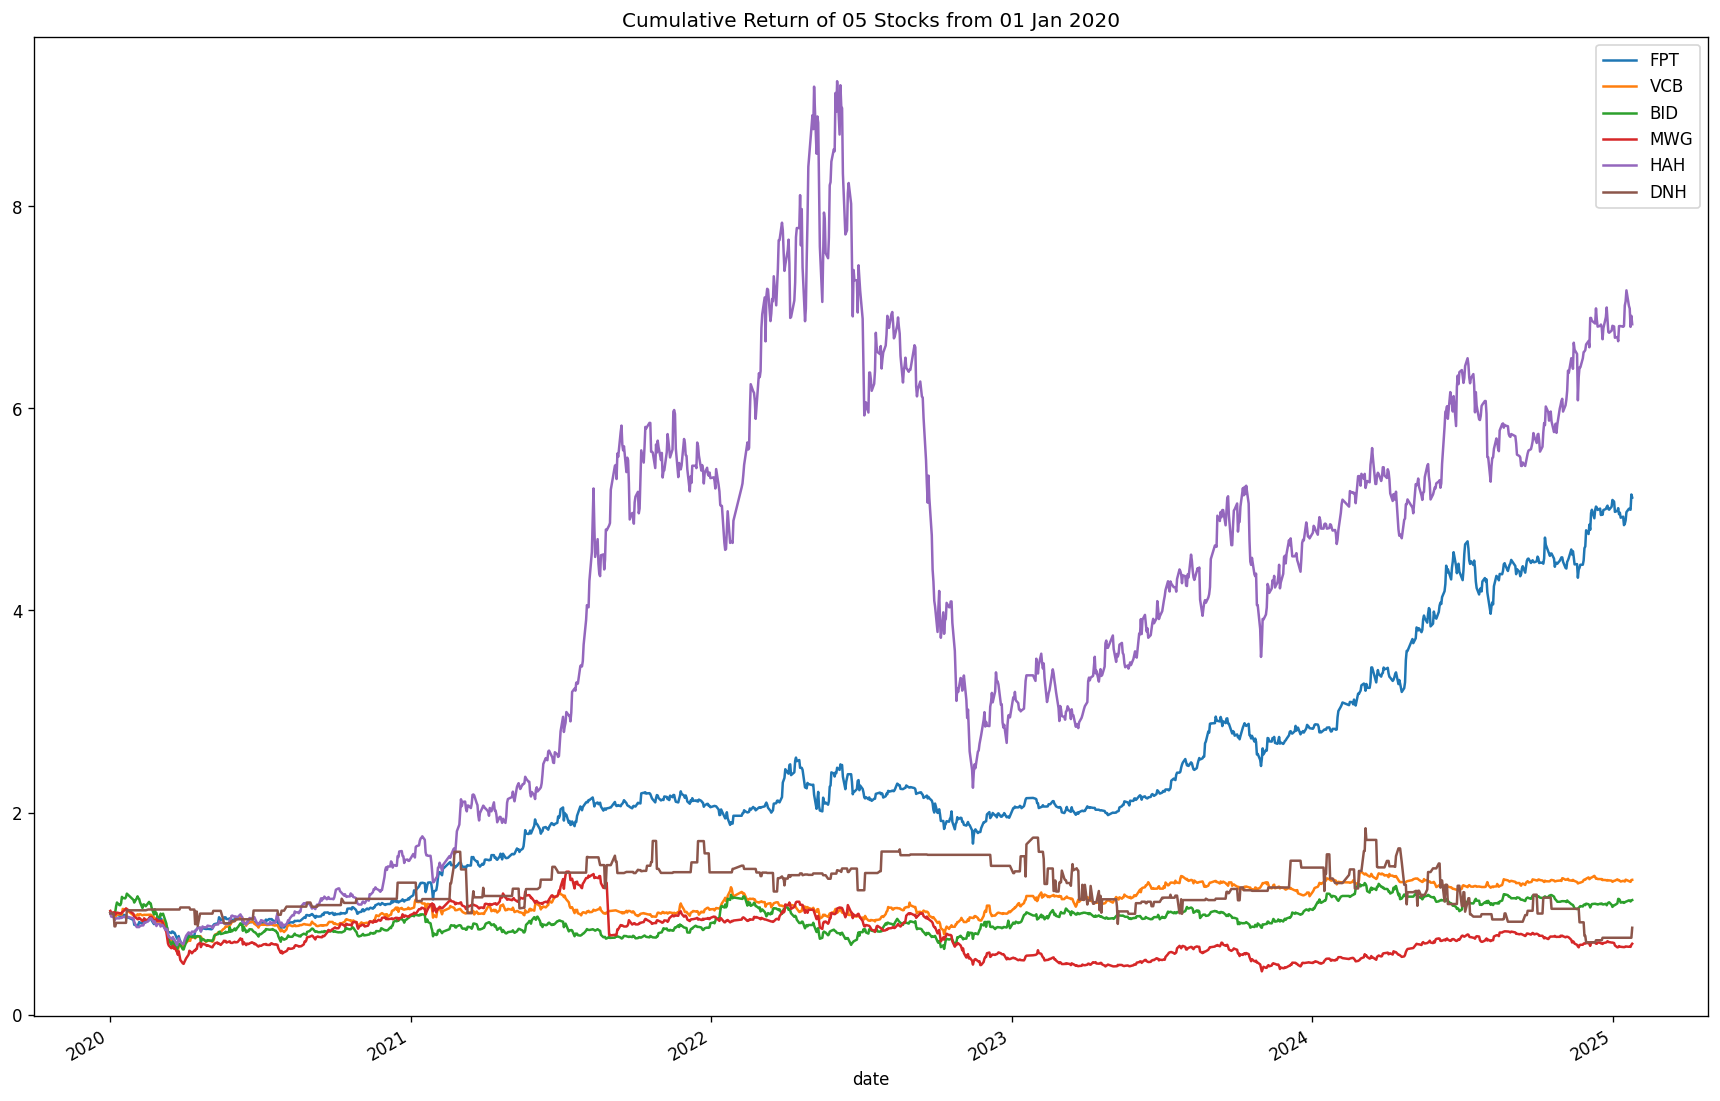

In [46]:
#@title Biểu Diễn Cumuilative Retuns từ 01/01/2020 { display-mode: "form" }
np.cumprod(1+R[['FPT','VCB','BID','MWG','HAH','DNH']].loc['2020-01-01':]).plot(title='Cumulative Return of 05 Stocks from 01 Jan 2020')

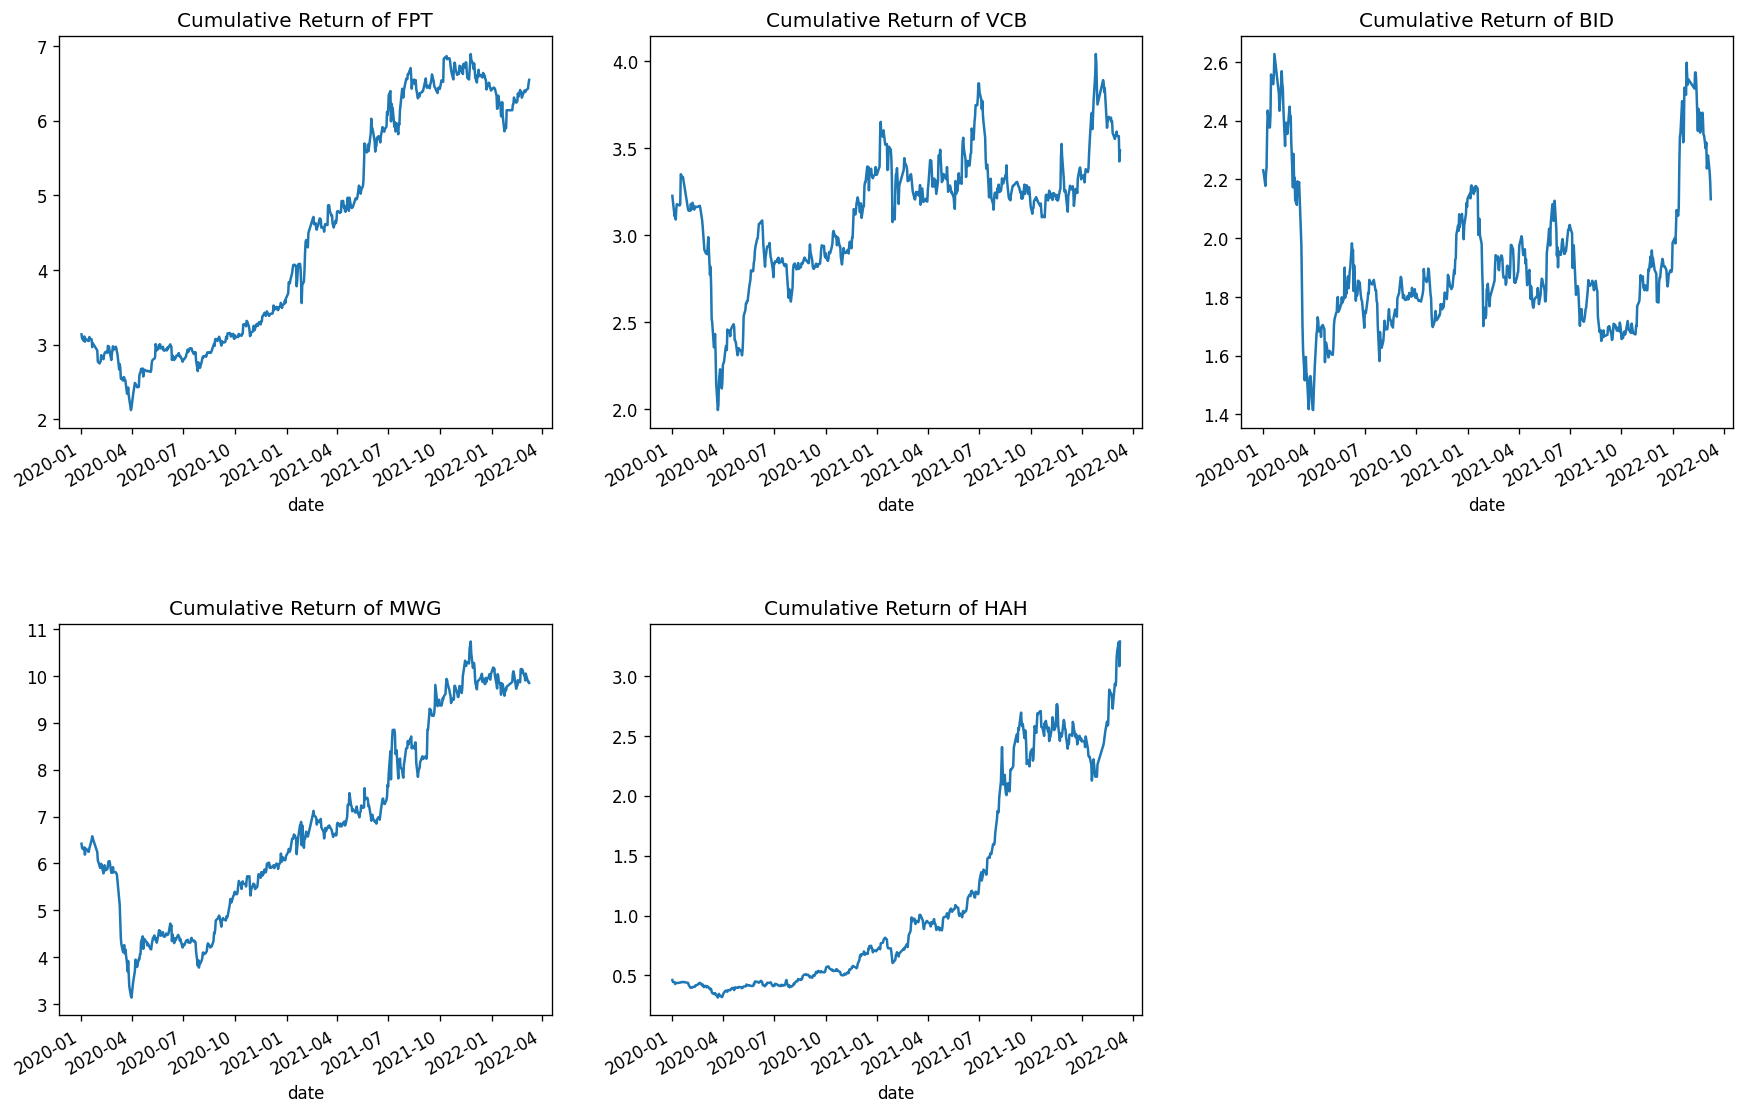

In [ ]:
#@title Biểu Diễn Cumuilative Retuns từ 01/01/2020 cho mỗi cổ phiếu { display-mode: "form" }
a =1
for ticker in ['FPT','VCB','BID','MWG','HAH']:
  plt.subplot(2,3,a)
  plt.title("Cumulative Return of "+ticker)
  plt.subplots_adjust (None, None, None, None, None, 0.5)
  np.cumprod(1+R[ticker]).loc['2020-01-01':].plot()
  a=a+1

# np.cumprod(1+R['FPT'].loc['2020-01-01':])

## IV. Kết Luận phân tích

